#**CAR PRICE PREDICTION (USED CARS)**

###**1) PLANTEAMIENTO DEL PROBLEMA**

####**Definir objetivo:**

El objetivo principal de este proyecto es predecir el precio de los coches usados ​​utilizando los distintos modelos de Machine Learning (ML). Este proyecto tiene como objetivo ofrecer modelos de predicción de precios al público, para ayudar a guiar a las personas que buscan
comprar o vender coches y darles una mejor visión del sector del automóvil

####**Tipo de problema:**

Supervisado. Es claramente un problema de regresión y las predicciones se llevan a cabo sobre un conjunto de datos de ventas de automóviles usados ​​en el mercado de automóviles estadounidense. Se estudiarán varias técnicas de regresión, incluidas la regresión lineal, los árboles de decisión y los bosques aleatorios de árboles de decisión. Sus desempeños se compararán para determinar cuál funciona mejor con nuestro conjunto de datos.

###**2) OBTENER LOS DATOS**

####**Conjunto de datos:**

De Kaggle: https://www.kaggle.com/datasets/vijayaadithyanvg/car-price-predictionused-cars

###**3) EXPLORACIÓN DE DATOS**

##**Importar Librerías:**

In [ ]:
import datetime

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics

from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from statsmodels.graphics.gofplots import ProbPlot

from statsmodels.formula.api import ols
import statsmodels.api as sm

##**Cargar Datos:**

In [ ]:
data= pd.read_csv("car data.csv")

##**Análisis Exploratorio de los Datos (EDA):**

In [ ]:
data.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [ ]:
data.shape

(301, 9)

In [ ]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [ ]:
data.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    148
Driven_kms       206
Fuel_Type          3
Selling_type       2
Transmission       2
Owner              3
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


## **Identificar si hay valores faltantes y duplicados**

In [ ]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [ ]:
data[data.duplicated()]

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [ ]:
# Eliminar valores duplicados y columnas que no agregan valor (Car Name)

data = data.drop_duplicates()
data[data.duplicated()]

data.drop(columns = ['Car_Name'], inplace = True)

## **Resumen de los datos**

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,299.0,2013.615385,2.896868,2003.00,2012.00,2014.00,2016.00,2018.0
Selling_Price,299.0,4.589632,4.984240,0.10,0.85,3.51,6.00,35.0
Present_Price,299.0,7.541037,8.566332,0.32,1.20,6.10,9.84,92.6
Driven_kms,299.0,36916.752508,39015.170352,500.00,15000.00,32000.00,48883.50,500000.0
Owner,299.0,0.043478,0.248720,0.00,0.00,0.00,0.00,3.0


## **Exploración Gráfica de las variables**

Year
Skew: -1.24
Stdv: 2.9


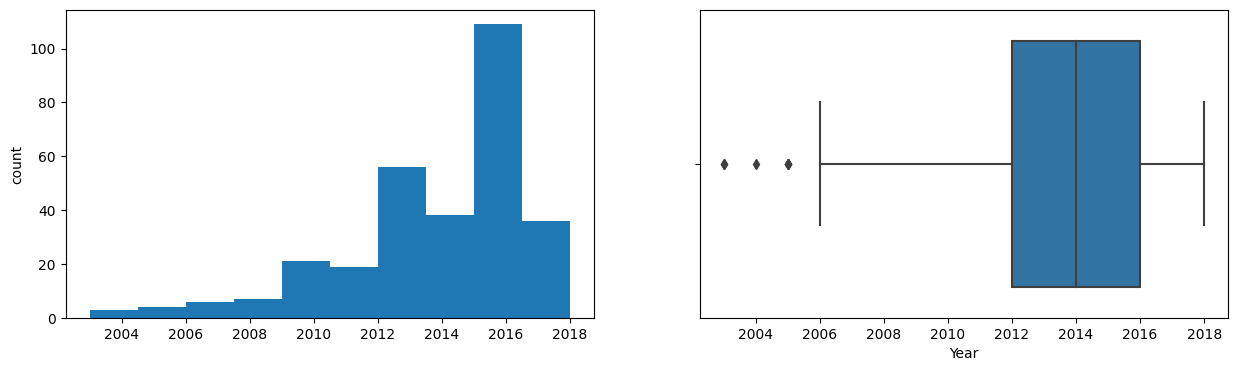

Selling_Price
Skew: 2.54
Stdv: 4.98


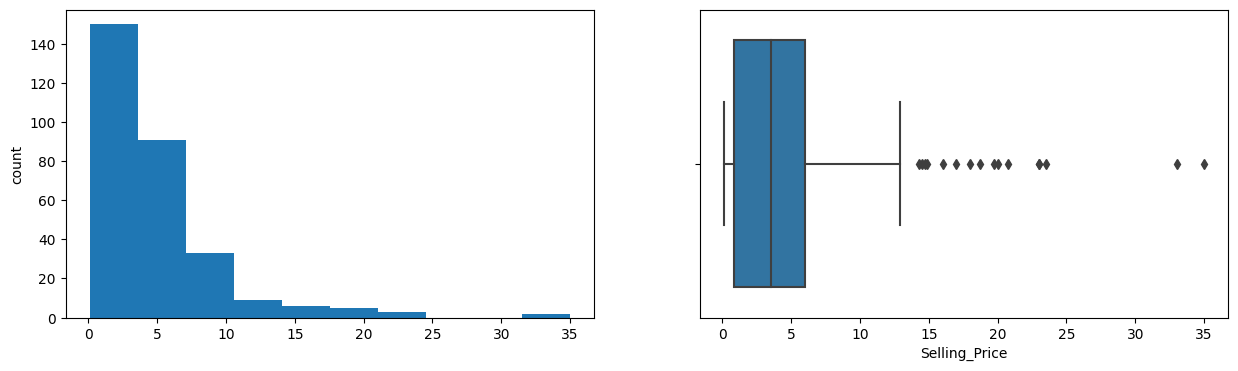

Present_Price
Skew: 4.19
Stdv: 8.57


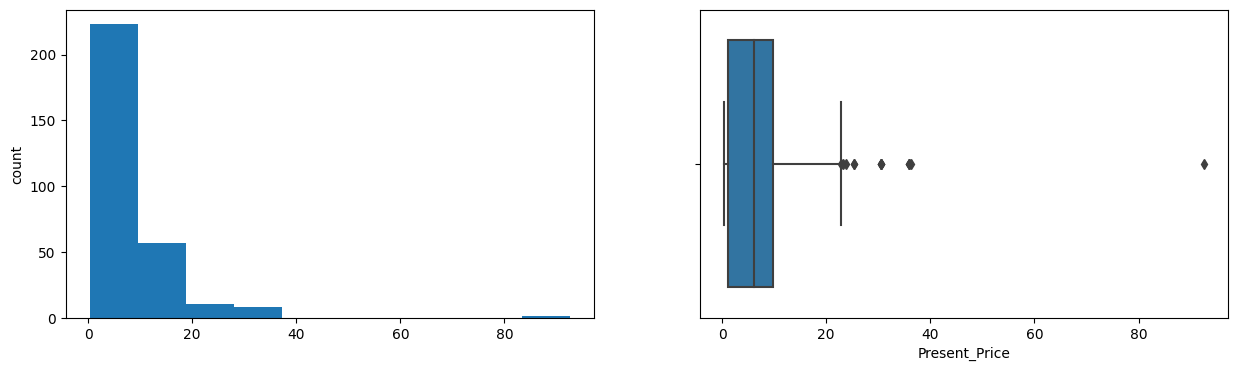

Driven_kms
Skew: 6.42
Stdv: 39015.17


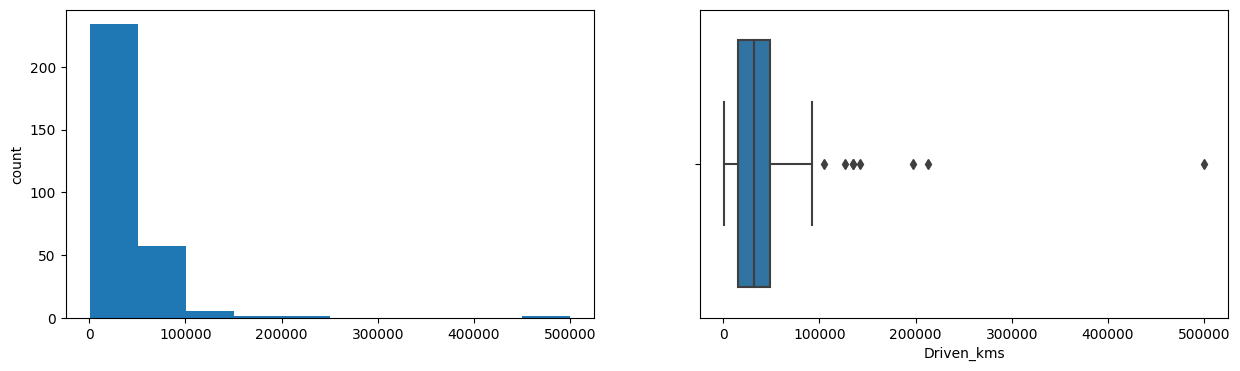

Owner
Skew: 7.59
Stdv: 0.25


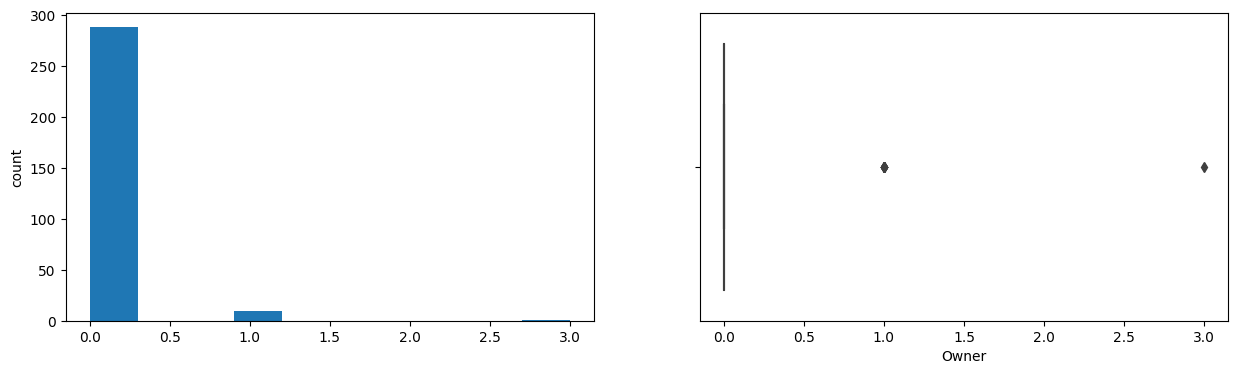

In [ ]:
# Para ver como es su distribución, si tienen sesgo y su desviación estándar y si tienen datos atípicos

# Variables Numéricas

numeric_columns = data.select_dtypes(include=['int', 'float']).columns

for col in numeric_columns:
    print(col)
    print('Skew:', round(data[col].skew(), 2))
    print('Stdv:', round(data[col].std(), 2))

    plt.figure(figsize=(15, 4))

    plt.subplot(1, 2, 1)
    data[col].hist(bins=10, grid=False)
    plt.ylabel('count')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])

    plt.show()

Podemos observar que nuestra variable objetivo "Present_Price" esta sesgada a la derecha, por lo que le aplicaremos una transformación logarítmica para ver si mejora la distribución y baja la varianza.

Sesgo de Present_Price_log: -0.36662374201159065
Desviación estándar de Present_Price_log: 1.2189079628909676


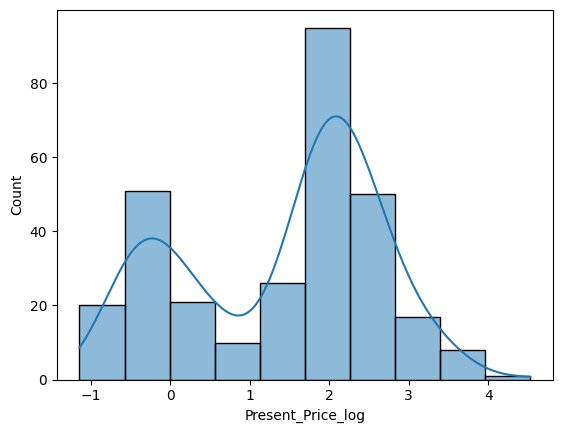

In [ ]:
# Transformación logaritmica a variable objetivo para mejorar la distribución y bajar la variabilidad

data['Present_Price_log'] = np.log(data['Present_Price'])
sns.histplot(data = data, x = 'Present_Price_log', kde = True)

from scipy.stats import skew

sesgo = skew(data['Present_Price_log'])
print(f"Sesgo de Present_Price_log: {sesgo}")

desviacion_estandar = data['Present_Price_log'].std()
print(f"Desviación estándar de Present_Price_log: {desviacion_estandar}")

Podemos notar que con la transformación logarítmica bajo el sesgo y la desviación estándar pero ahora tiene una distribución bimodal.

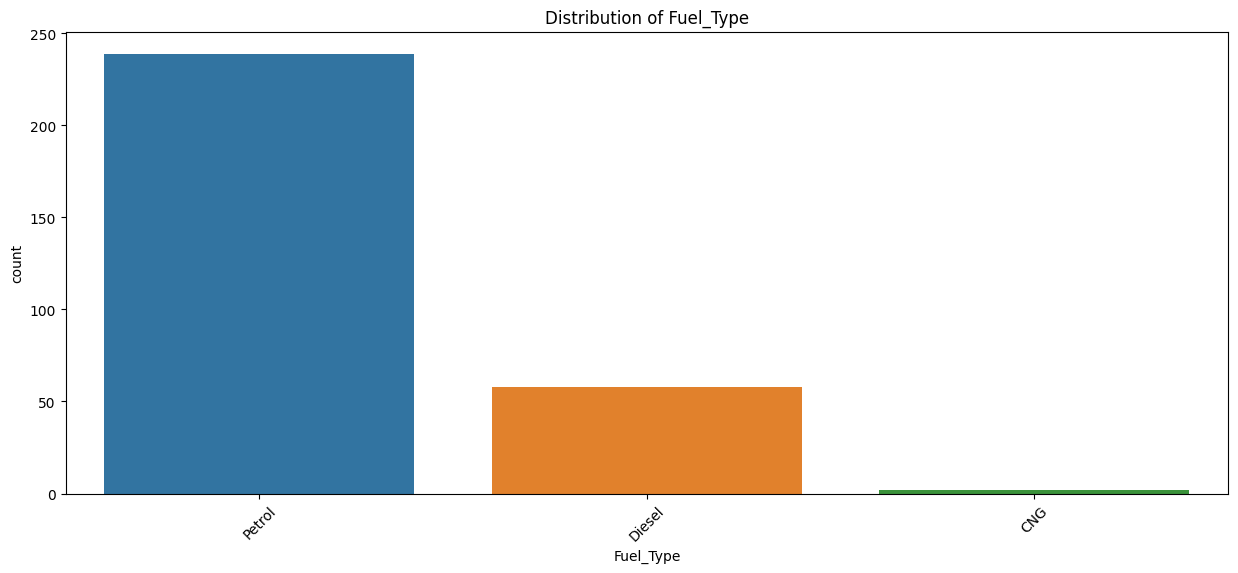

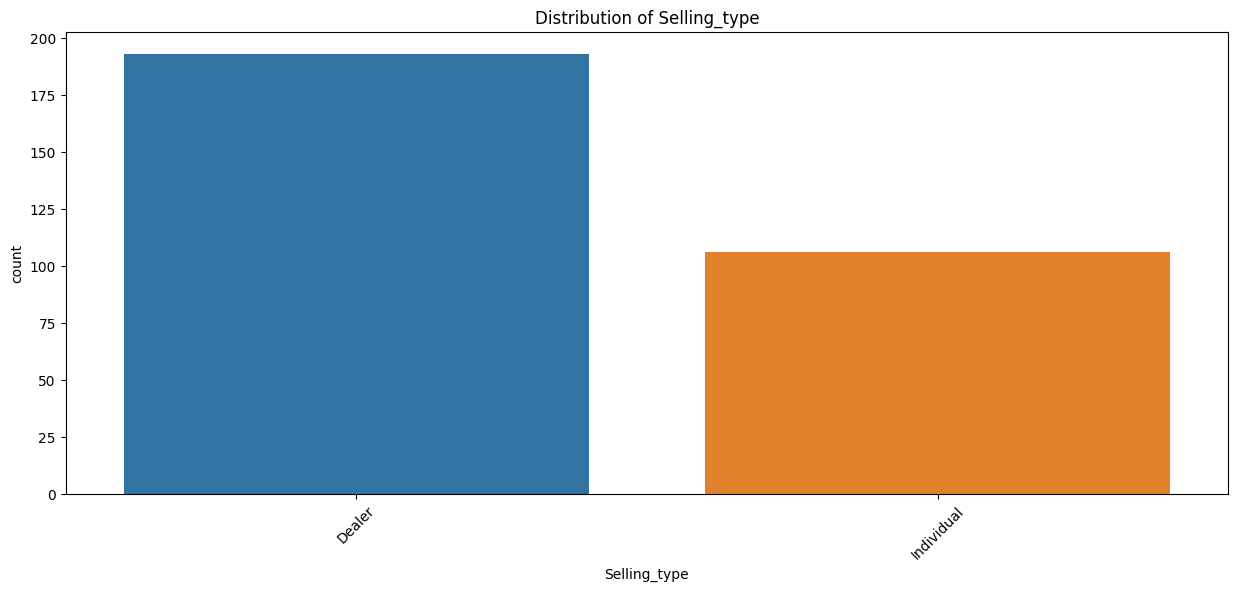

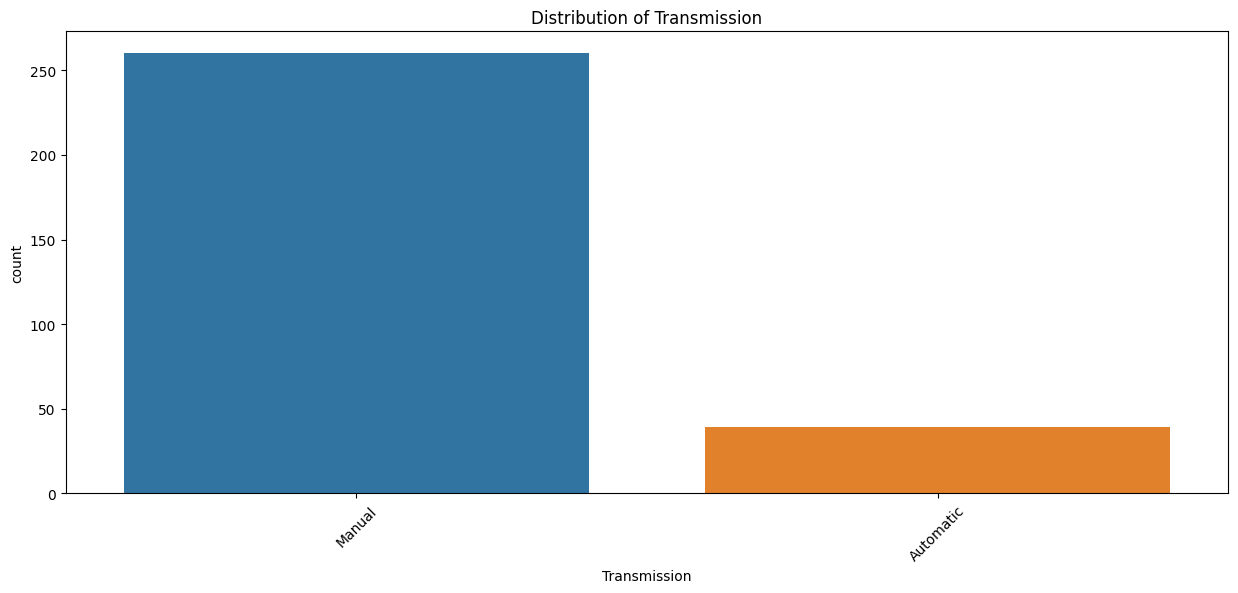

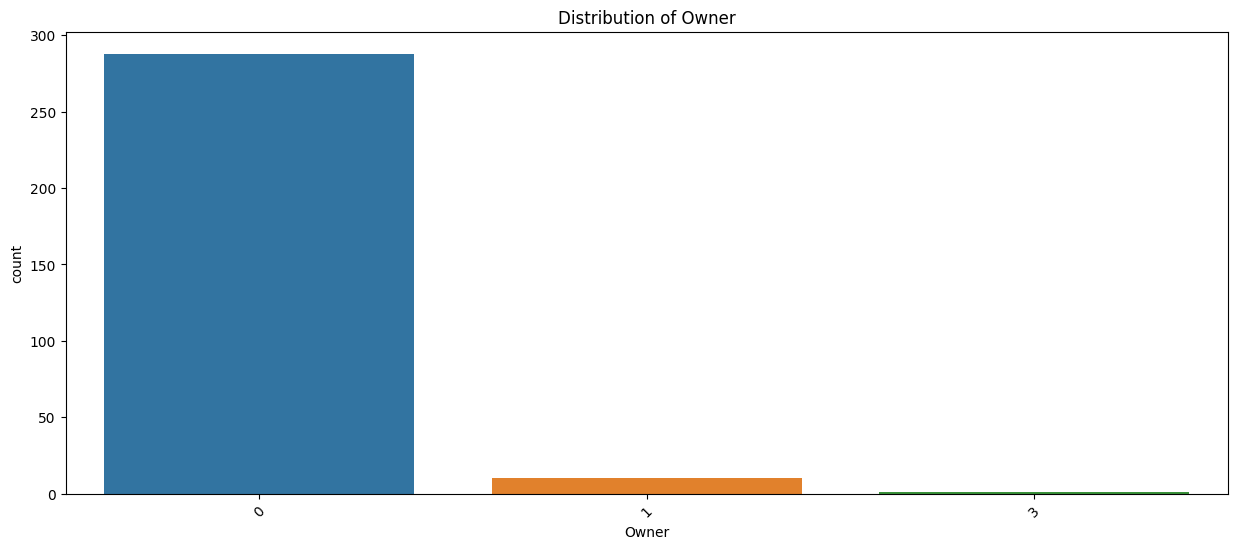

In [ ]:
# Variables categóricas

categorical_columns = ['Fuel_Type', 'Selling_type', 'Transmission', 'Owner']

for col in categorical_columns:
    plt.figure(figsize=(15, 6))
    sns.countplot(data=data, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

**Como la variable dependiente está ligeramente sesgada, aplicaremos una transformación logarítmica en la columna 'Present_Price' y comprobaremos la distribución de la columna transformada.**

## **Comprobar correlación de las variables (Análisis Bivariado)**

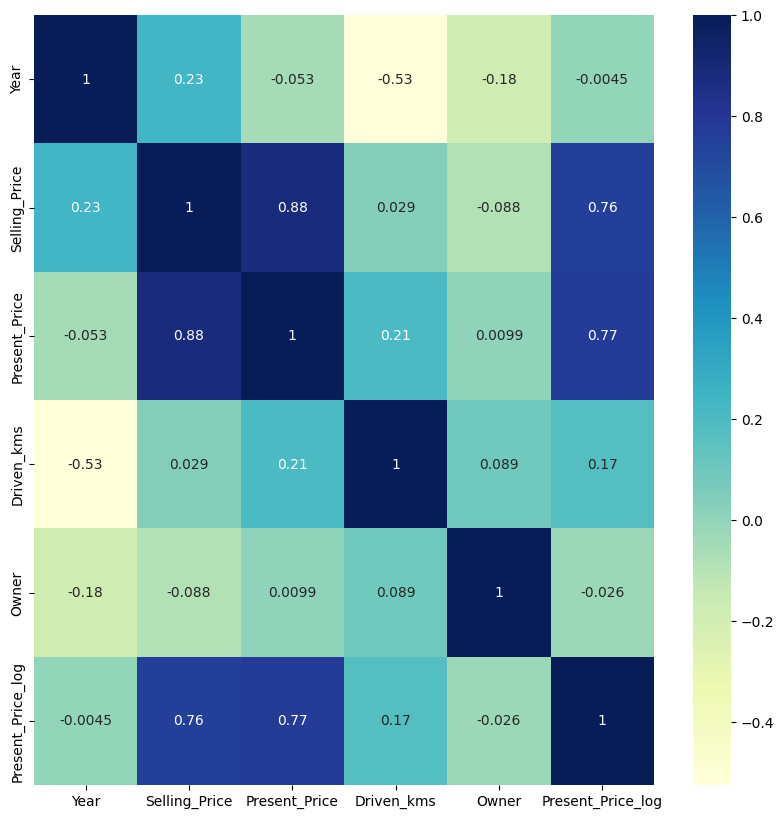

In [ ]:
plt.figure(figsize  = (10,10))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.show()

##**Cambiar variables categóricas a numéricas**

In [ ]:
# Lista de las columnas categóricas que deseas codificar
categorical_columns = ["Fuel_Type", "Selling_type", "Owner", "Transmission"]

# Aplicar codificación one-hot a las columnas categóricas
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Verificar el cambio en el DataFrame
print(data.head())

   Year  Selling_Price  Present_Price  Driven_kms  Present_Price_log  \
0  2014           3.35           5.59       27000           1.720979   
1  2013           4.75           9.54       43000           2.255493   
2  2017           7.25           9.85        6900           2.287471   
3  2011           2.85           4.15        5200           1.423108   
4  2014           4.60           6.87       42450           1.927164   

   Fuel_Type_Diesel  Fuel_Type_Petrol  Selling_type_Individual  Owner_1  \
0                 0                 1                        0        0   
1                 1                 0                        0        0   
2                 0                 1                        0        0   
3                 0                 1                        0        0   
4                 1                 0                        0        0   

   Owner_3  Transmission_Manual  
0        0                    1  
1        0                    1  
2        0    

In [ ]:
value_counts = data['Owner_1'].value_counts()
print(value_counts)
print(data['Owner_1'])

0    289
1     10
Name: Owner_1, dtype: int64
0      0
1      0
2      0
3      0
4      0
      ..
296    0
297    0
298    0
299    0
300    0
Name: Owner_1, Length: 299, dtype: uint8


In [ ]:
# Comprobación

data.info()
variable_types = data.dtypes
print(variable_types)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 300
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     299 non-null    int64  
 1   Selling_Price            299 non-null    float64
 2   Present_Price            299 non-null    float64
 3   Driven_kms               299 non-null    int64  
 4   Present_Price_log        299 non-null    float64
 5   Fuel_Type_Diesel         299 non-null    uint8  
 6   Fuel_Type_Petrol         299 non-null    uint8  
 7   Selling_type_Individual  299 non-null    uint8  
 8   Owner_1                  299 non-null    uint8  
 9   Owner_3                  299 non-null    uint8  
 10  Transmission_Manual      299 non-null    uint8  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 15.8 KB
Year                         int64
Selling_Price              float64
Present_Price              float64
Driven_kms                 

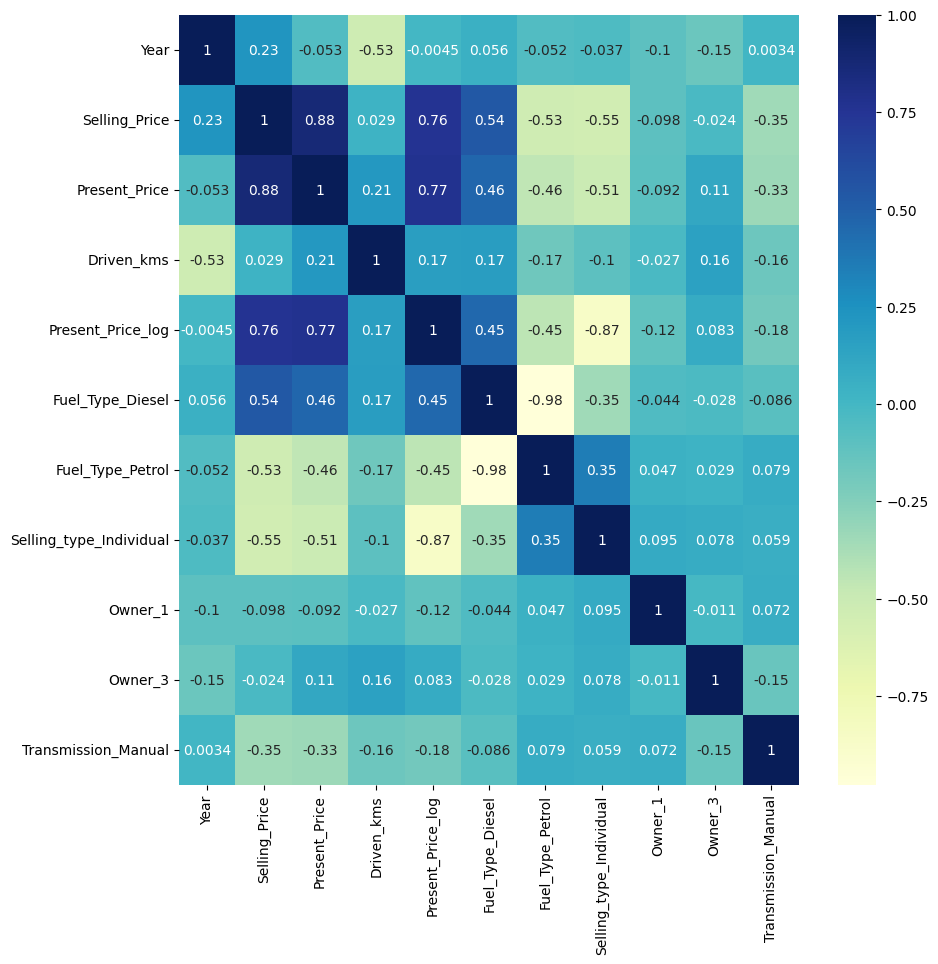

In [ ]:
plt.figure(figsize  = (10,10))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.show()

## **Escalar los datos usando StandarScaler**

In [ ]:
scaler=StandardScaler()
data_scaled=pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
data_scaled.head()

,Year,Selling_Price,Present_Price,Driven_kms,Present_Price_log,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Owner_1,Owner_3,Transmission_Manual
0,0.132992,-0.249127,-0.228138,-0.254603,0.244546,-0.490575,0.501045,-0.741096,-0.186016,-0.057928,0.387298
1,-0.212787,0.032229,0.233742,0.156181,0.683800,2.038424,-1.995829,-0.741096,-0.186016,-0.057928,0.387298
2,1.170329,0.534651,0.269991,-0.770651,0.710079,-0.490575,0.501045,-0.741096,-0.186016,-0.057928,0.387298
3,-0.904345,-0.349612,-0.396520,-0.814297,-0.000239,-0.490575,0.501045,-0.741096,-0.186016,-0.057928,0.387298
4,0.132992,0.002084,-0.078466,0.142061,0.413985,2.038424,-1.995829,-0.741096,-0.186016,-0.057928,0.387298


**Eliminar valores atípicos** (Esto es lo unico aue no estoy seguro)

Year
Skew : -0.66
Stdv: 0.79


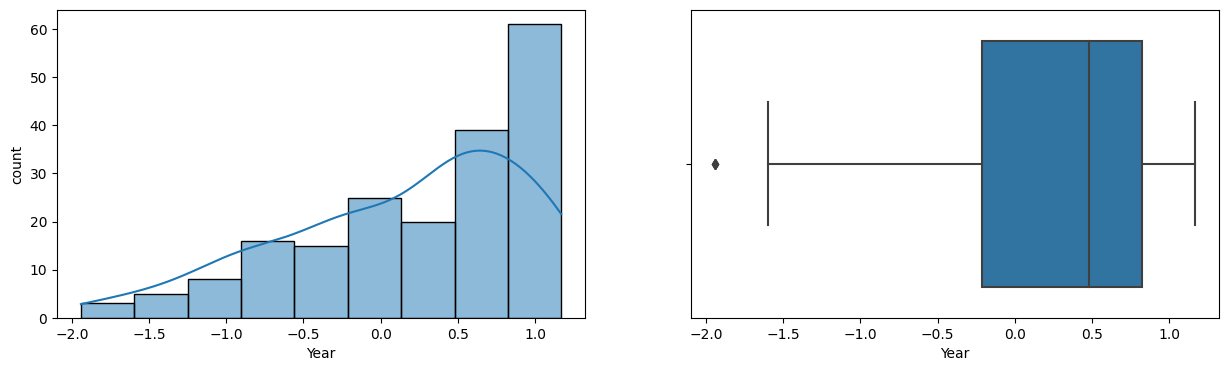

Selling_Price
Skew : 1.02
Stdv: 0.55


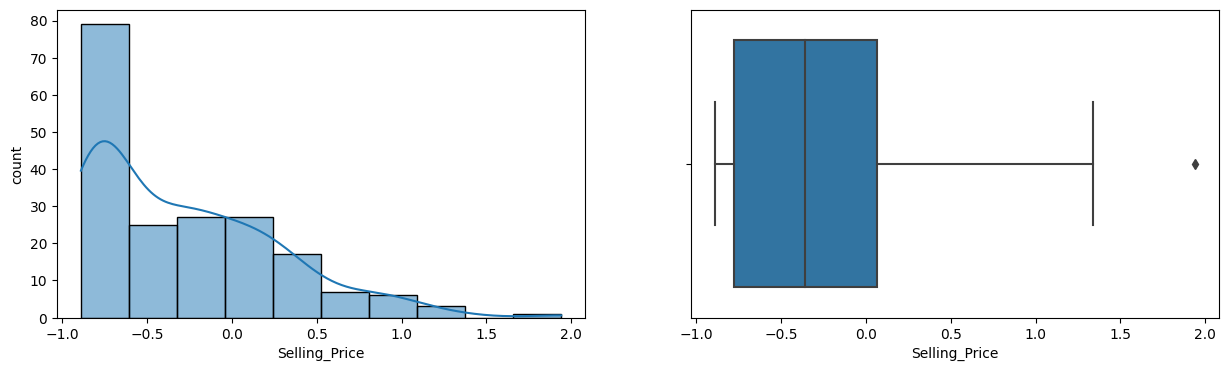

Present_Price
Skew : 1.11
Stdv: 0.55


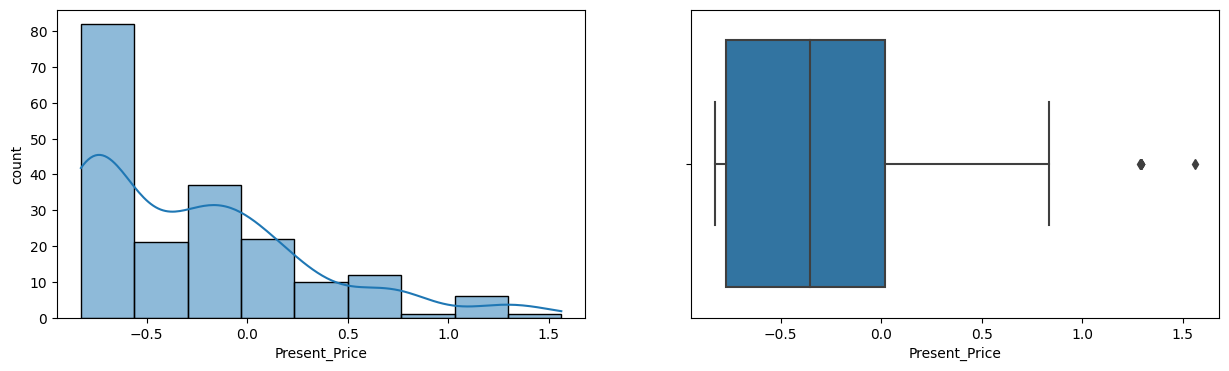

Driven_kms
Skew : 0.7
Stdv: 0.5


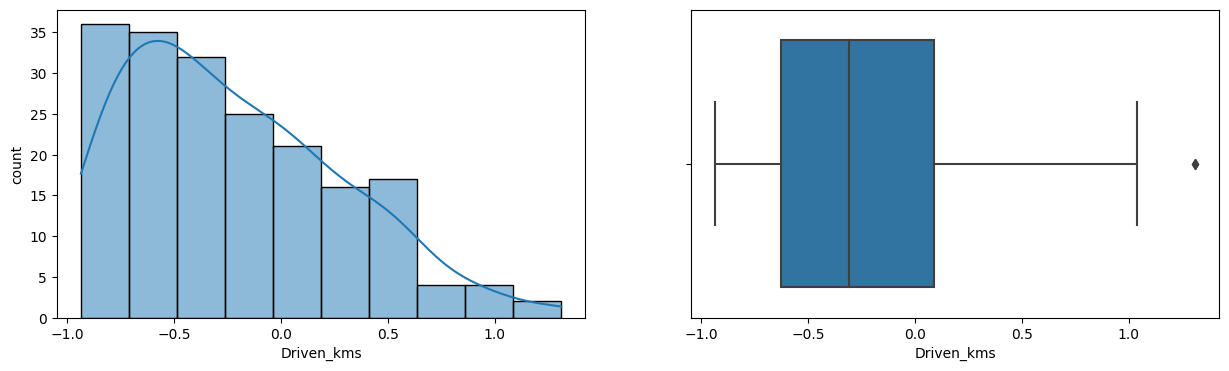

Present_Price_log
Skew : -0.2
Stdv: 0.91


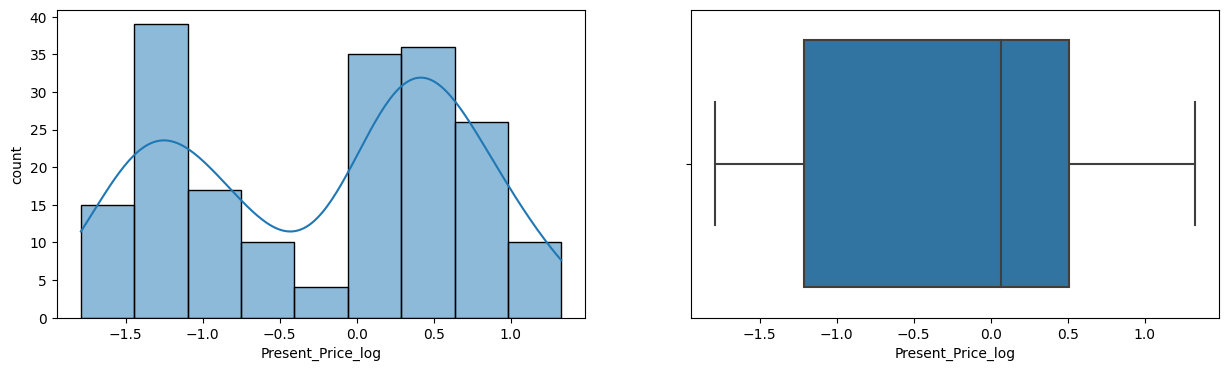

Fuel_Type_Diesel
Skew : 0
Stdv: 0.0


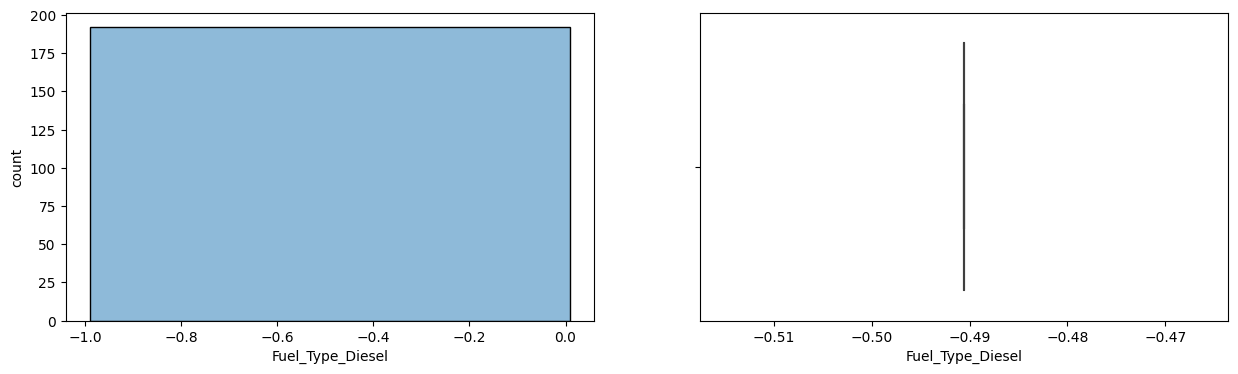

Fuel_Type_Petrol
Skew : -9.72
Stdv: 0.25


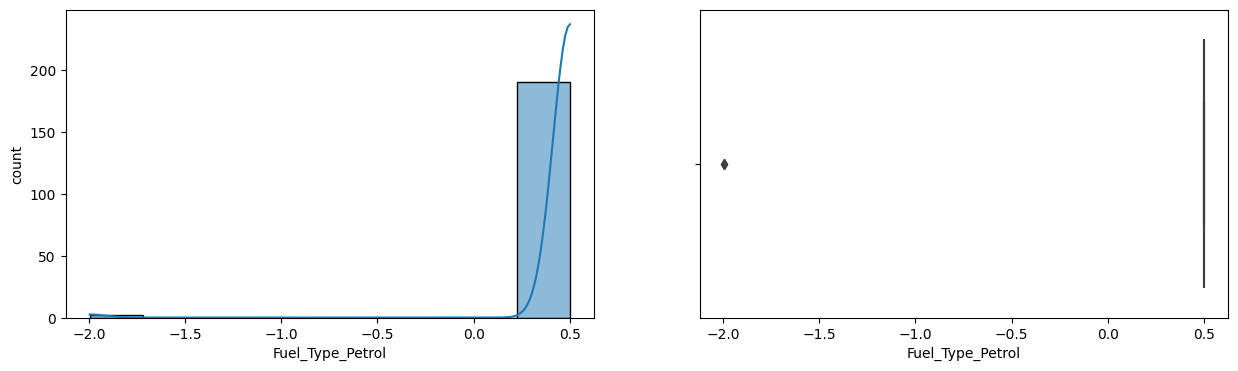

Selling_type_Individual
Skew : 0.3
Stdv: 1.04


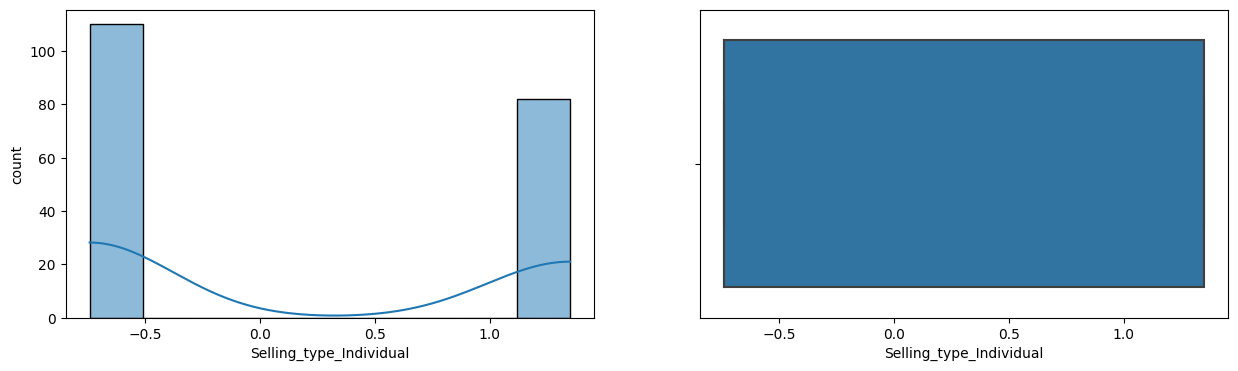

Owner_1
Skew : 0
Stdv: 0.0


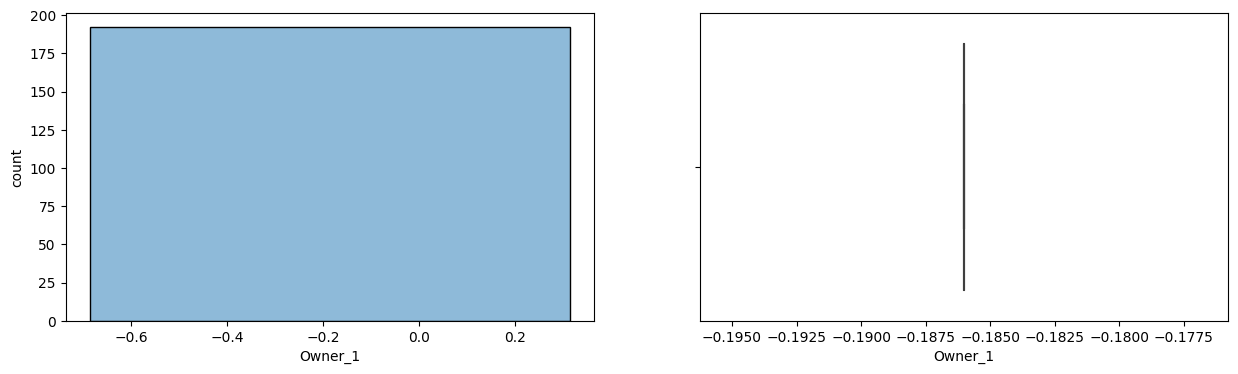

Owner_3
Skew : 0
Stdv: 0.0


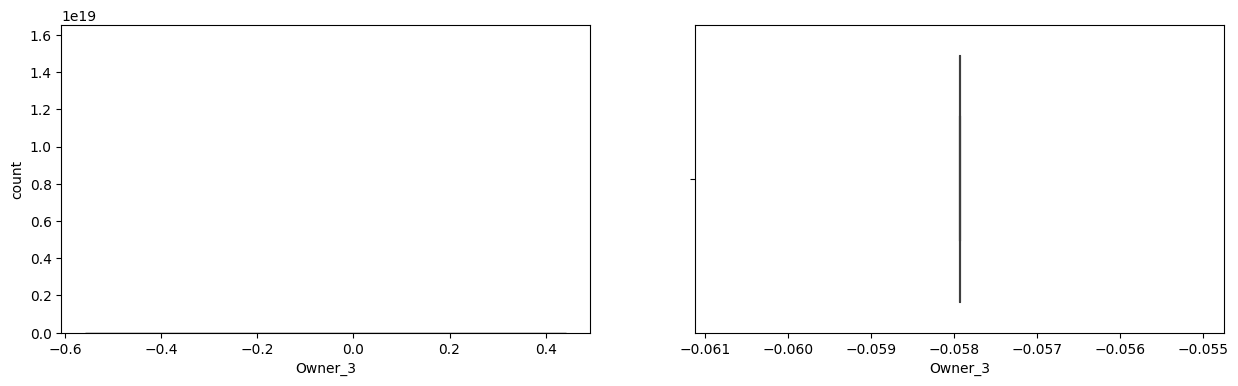

Transmission_Manual
Skew : 0
Stdv: 0.0


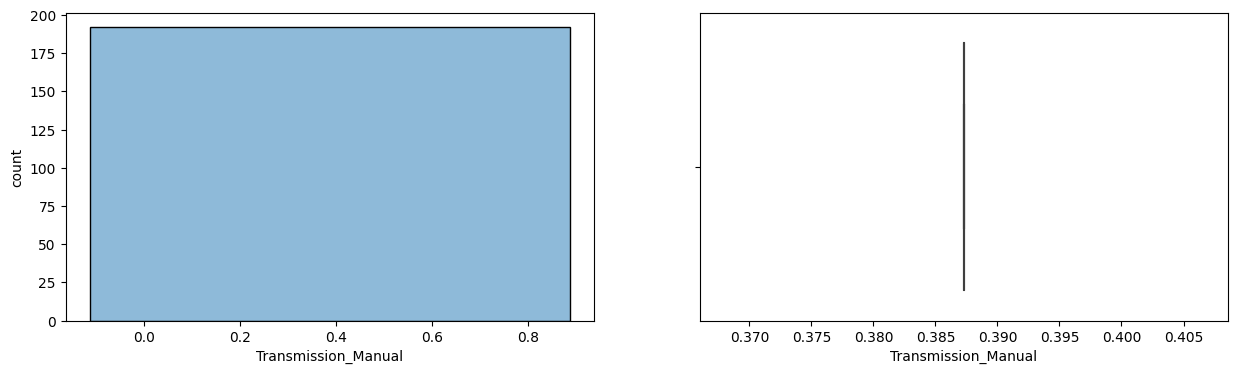

In [ ]:
from scipy import stats
# Calcular z-scores en los datos estandarizados
z_scores = np.abs(stats.zscore(data_scaled))

# Establecer un umbral para identificar valores atípicos (puedes ajustar esto según tus necesidades)
threshold = 2

# Filtrar valores atípicos en los datos estandarizados
data_scaled_no_outliers = data_scaled[(z_scores <= threshold).all(axis=1)]

# Visualizar los datos estandarizados sin valores atípicos
for col in data_scaled_no_outliers.columns:
    print(col)
    print('Skew :', round(data_scaled_no_outliers[col].skew(), 2))
    print('Stdv:', round(data_scaled_no_outliers[col].std(), 2))
    plt.figure(figsize=(15, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data=data_scaled_no_outliers, x=col, kde=True)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data_scaled_no_outliers[col])
    plt.show()

## **Construcción de modelos - Enfoque**

1. Preparar de datos
2. Dividir los datos en conjunto de entrenamiento y conjunto de prueba
3. Construir el modelo sobre los datos de entrenamiento
4. Validación cruzada del modelo
5. Probar los datos en el conjunto de prueba

### **Definir la variable dependiente e independientes**

In [ ]:
Y = data_scaled_no_outliers['Present_Price_log'] # variable dependiente
X = data_scaled_no_outliers.drop(columns = {'Present_Price', 'Present_Price_log'}) # variables independientes (todas las que no sean MEDV y MEDV_log)

# Add the intercept term
X = sm.add_constant(X)

### **Dividir el conjunto de datos**
Dividamos los datos en variables dependientes e independientes y luego dividámoslos en conjunto de prueba y entrenamiento en una proporción de 70:30 para conjunto de prueba y entrenamiento.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30 , random_state = 1)

### **Comprobar multicolinealidad**

* **La multicolinealidad** ocurre cuando las variables predictoras en un modelo de regresión están correlacionadas. Esta correlación es un problema porque las variables predictoras deben ser independientes. Si la correlación entre variables es alta, puede causar problemas cuando ajustamos el modelo e interpretamos los resultados. Cuando tenemos multicolinealidad en el modelo lineal, los coeficientes que sugiere el modelo no son confiables.
* Hay diferentes formas de detectar (o probar) la multicolinealidad, una de ellas es el factor de inflación de variación.
* **Factor de inflación de varianza**: Los factores de inflación de varianza miden la inflación en las varianzas de las estimaciones de los parámetros de regresión debido a la colinealidad que existe entre los predictores. Es una medida de cuánto se "infla" la varianza del coeficiente de regresión estimado βk por la existencia de correlación entre las variables predictoras en el modelo.
* Regla general: si VIF es 1, entonces no hay correlación entre el predictor k-ésimo y las variables predictoras restantes y, por lo tanto, la varianza de β̂k no se infla en absoluto. Mientras que si **VIF excede 5 o está cerca de exceder 5, decimos que hay un VIF moderado y si es 10 o excede 10, muestra signos de alta multicolinealidad.**>

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(X_train))

                   feature       VIF
0                     Year  1.679695
1            Selling_Price  2.945759
2               Driven_kms  1.653818
3         Fuel_Type_Diesel  0.073184
4         Fuel_Type_Petrol  1.030372
5  Selling_type_Individual  3.014897
6                  Owner_1  0.033300
7                  Owner_3  0.020202
8      Transmission_Manual  0.000000


Ahora, crearemos **el modelo de regresión lineal** ya que el VIF es inferior a 5 para casi todas las variables independientes y podemos suponer que se ha eliminado la multicolinealidad entre las variables.

## **MODELO REGRESIÓN LINEAL (usando statsmodels OLS)**

- La regresión lineal es adecuada para problemas que buscan predecir o modelar una variable de respuesta continua.
- Si está trabajando con un problema de regresión (predecir valores numéricos), un modelo de regresión lineal es una opción razonable.

In [ ]:
# Create the model
model1 = sm.OLS(y_train, X_train).fit()

# Get the model summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Present_Price_log   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     329.1
Date:                Wed, 01 Nov 2023   Prob (F-statistic):           3.04e-71
Time:                        17:58:57   Log-Likelihood:                0.49349
No. Observations:                 134   AIC:                             11.01
Df Residuals:                     128   BIC:                             28.40
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Year                       -0.1116      0.036     -3.063      0.003      -0.184      -0.040
Selling_Price               0.8291      0.068     12.254      0.000       0.695       0.963
Driven_kms                  0.0751      0.057      1.312      0.192      -0.038       0.188
Fuel_Type_Diesel           -0.1276      0.052     -2.460      0.015      -0.230      -0.025
Fuel_Type_Petrol           -0.0549      0.071     -0.769      0.443      -0.196       0.086
Selling_type_Individual    -0.4478      0.036    -12.478      0.000      -0.519      -0.377
Owner_1                    -0.0484      0.020     -2.460      0.015      -0.087      -0.009
Owner_3                    -0.0151      0.006     -2.460      0.015      -0.027      -0.003
Transmission_Manual         0.1007      0.041      2.460      0.015       0.020       0.182
==============================================================================
Omnibus:                        4.371   Durbin-Watson:                   1.841
Prob(Omnibus):                  0.112   Jarque-Bera (JB):                3.908
Skew:                           0.326   Prob(JB):                        0.142
Kurtosis:                       3.525   Cond. No.                     1.35e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.07e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Podemos ver que el R-cuadrado para el modelo es 0.928.
No todas las variables son estadísticamente significativas para predecir la variable resultado. Para verificar cuáles son estadísticamente significativos o tienen poder predictivo para predecir la variable objetivo, debemos verificar el "valor p" con todas las variables independientes.

**Interpretación de los resultados de la regresión:**

1. **Adj. R-squared**: Refleja el ajuste del modelo.
    - Los valores de R-cuadrado van de 0 a 1, donde un valor más alto generalmente indica un mejor ajuste, suponiendo que se cumplan ciertas condiciones.
    - En nuestro caso, el valor de Adj. R-cuadrado es **0.925**

2. **coef**: Representa el cambio en la salida Y debido a un cambio de una unidad en la variable (todo lo demás se mantiene constante).
3. **std err**: Refleja el nivel de precisión de los coeficientes.
    - Cuanto más bajo es, más precisos son los coeficientes.
4. **P >|t|**: Es el valor p.
   
   * Pr(>|t|): Para cada característica independiente hay una hipótesis nula y una hipótesis alternativa

      Ho: la característica independiente no es significativa

      Ha: la característica independiente es importante
  * Un valor de p inferior a 0,05 se considera estadísticamente significativo.

   
5. **Intervalo de confianza**: Representa el rango en el que es probable que caigan nuestros coeficientes (con una probabilidad del 95%).



*Tanto el valor de **R-cuadrado como el R-cuadrado ajustado del modelo están alrededor del 92%**. Esta es una clara indicación de que hemos sido capaces de crear un buen modelo que puede explicar la variación en los precios de los carros hasta en un 92%.* Podemos examinar la importancia del modelo de regresión e intentar descartar variables insignificantes.

#### **Descartando las variables insignificantes del modelo anterior y creando de nuevo el modelo de regresión.**

### **Examinando la importancia del modelo**

No basta con ajustar un modelo de regresión múltiple a los datos, es necesario comprobar si todos los coeficientes de regresión son significativos o no. La importancia aquí significa si los parámetros de regresión de población son significativamente diferentes de cero.

De lo anterior, se puede notar que los coeficientes de regresión correspondientes a Driven_kms y Fuel_Type_Diesel no son estadísticamente significativos al nivel α = 0.05. En otras palabras, los coeficientes de regresión correspondientes a estos tres no son significativamente diferentes de 0 en la población. Por lo tanto, eliminaremos las tres características y crearemos un nuevo modelo.

### **Creando nuevo modelo de regresión lineal sin variables irrelevantes**

In [ ]:
# Create the model after dropping TAX
Y = data_scaled_no_outliers['Present_Price_log']
X = data_scaled_no_outliers.drop(columns = {'Present_Price', 'Present_Price_log', 'Driven_kms', 'Fuel_Type_Petrol'})
X = sm.add_constant(X)

# Splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30 , random_state = 1)

# Create the model
model2 = sm.OLS(y_train, X_train).fit()

# Get the model summary
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Present_Price_log   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     546.1
Date:                Wed, 01 Nov 2023   Prob (F-statistic):           1.82e-73
Time:                        17:58:57   Log-Likelihood:               -0.75028
No. Observations:                 134   AIC:                             9.501
Df Residuals:                     130   BIC:                             21.09
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Year                       -0.1367      0.031     -4.395      0.000      -0.198      -0.075
Selling_Price               0.8199      0.067     12.191      0.000       0.687       0.953
Fuel_Type_Diesel           -0.0831      0.032     -2.574      0.011      -0.147      -0.019
Selling_type_Individual    -0.4630      0.035    -13.390      0.000      -0.531      -0.395
Owner_1                    -0.0315      0.012     -2.574      0.011      -0.056      -0.007
Owner_3                    -0.0098      0.004     -2.574      0.011      -0.017      -0.002
Transmission_Manual         0.0656      0.025      2.574      0.011       0.015       0.116
==============================================================================
Omnibus:                        4.857   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.088   Jarque-Bera (JB):                4.311
Skew:                           0.393   Prob(JB):                        0.116
Kurtosis:                       3.395   Cond. No.                     1.57e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.36e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### **Comprobación del rendimiento del modelo en el conjunto de datos de prueba y entrenamiento**

In [ ]:
from sklearn.metrics import r2_score

# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())

# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))

# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test, y_train, y_test):

    # Insample Prediction
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    # Calculate R^2
    r2_train = r2_score(y_observed_train, y_pred_train)
    r2_test = r2_score(y_observed_test, y_pred_test)

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train, y_observed_train),
                    rmse(y_pred_test, y_observed_test),
                ],
                "MAE": [
                    mae(y_pred_train, y_observed_train),
                    mae(y_pred_test, y_observed_test),
                ],
                "R^2": [r2_train, r2_test]  # Agregar R^2
            }
        )
    )

# Checking model performance
model_pref(model2, X_train, X_test, y_train, y_test)


    Data      RMSE       MAE       R^2
0  Train  0.243329  0.188913  0.926483
1   Test  0.311012  0.237471  0.885012


### **Aplicar la técnica de validación cruzada para mejorar el modelo y evaluarlo utilizando diferentes métricas de evaluación.**

In [ ]:
# Import the required function

from sklearn.model_selection import cross_val_score

# Build the regression model using Sklearn Linear regression
linearregression = LinearRegression()

cv_Score11 = cross_val_score(linearregression, X_train, y_train, cv = 10) # cv = 10 represents data is divided into 10 folds.
cv_Score12 = cross_val_score(linearregression, X_train, y_train, cv = 10,
                             scoring = 'neg_mean_squared_error')


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.913 (+/- 0.064)
Mean Squared Error: 0.065 (+/- 0.051)


**Obtenga los coeficientes del modelo en un marco de datos de pandas con la columna 'Feature' que tiene todas las características y la columna 'Coefs' con todos los Coefs correspondientes. Escribe la ecuación de regresión.**

In [ ]:
coef = model2.params
coef

Year                      -0.136694
Selling_Price              0.819926
Fuel_Type_Diesel          -0.083095
Selling_type_Individual   -0.462956
Owner_1                   -0.031508
Owner_3                   -0.009812
Transmission_Manual        0.065602
dtype: float64

In [ ]:
# Let us write the equation of the fit
Equation = "log (Price) ="
print(Equation, end = '\t')
for i in range(len(coef)):
    print('(', coef[i], ') * ', coef.index[i], '+', end = ' ')

log (Price) =	( -0.1366941222081054 ) *  Year + ( 0.8199256614587289 ) *  Selling_Price + ( -0.08309547486127475 ) *  Fuel_Type_Diesel + ( -0.46295632729142344 ) *  Selling_type_Individual + ( -0.031508155281708985 ) *  Owner_1 + ( -0.009812140686108344 ) *  Owner_3 + ( 0.06560206770008108 ) *  Transmission_Manual + 

#### **Construyamos ahora modelos no lineales como el árbol de decisión y Random forest, comprobemos además su rendimiento**

## **MODELO DECISION TREE**

In [ ]:
# Importing Decision tree regressor using sklearn
from sklearn.tree import DecisionTreeRegressor

# Splitting the data in 70:30 ratio of train to test data
# Separate the dependent and indepedent variable
Y1 = data_scaled_no_outliers['Present_Price_log']
X1 = data_scaled_no_outliers.drop(columns = {'Present_Price', 'Present_Price_log','Driven_kms', 'Fuel_Type_Petrol'})
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size = 0.30 , random_state = 1)

# Defining the Descision tree regressor
dt = DecisionTreeRegressor(min_samples_split = 2)

# Fitting Descision Tree regressor to train dataset
dt.fit(X_train1,y_train1)

DecisionTreeRegressor()

In [ ]:
model_pref(dt, X_train1, X_test1, y_train1, y_test1)

    Data      RMSE       MAE       R^2
0  Train  0.027589  0.005892  0.999055
1   Test  0.226939  0.166835  0.938776


In [ ]:
y_pred_train1 = dt.predict(X_train1)
y_pred_test1 = dt.predict(X_test1)

# Crea DataFrames para comparar los valores reales con las predicciones
train_predictions_df = pd.DataFrame({
    'Valores Observados (Train)': y_train1,
    'Predicciones (Train)': y_pred_train1
})

test_predictions_df = pd.DataFrame({
    'Valores Observados (Test)': y_test1,
    'Predicciones (Test)': y_pred_test1
})

# Imprime los DataFrames
print("Predicciones en el conjunto de entrenamiento:")
print(train_predictions_df)

print("\nPredicciones en el conjunto de prueba:")
print(test_predictions_df)





Predicciones en el conjunto de entrenamiento:
     Valores Observados (Train)  Predicciones (Train)
156                   -1.676094             -1.691601
213                    0.671651              0.671651
34                     0.511972              0.298167
276                    0.579219              0.579219
152                   -1.274775             -1.274775
..                          ...                   ...
214                    0.053416              0.053416
218                    0.220681              0.220681
129                   -1.332807             -1.332807
225                    0.053416              0.053416
87                     0.309532              0.309532

[134 rows x 2 columns]

Predicciones en el conjunto de prueba:
     Valores Observados (Test)  Predicciones (Test)
100                  -0.695873            -0.677611
126                  -1.284167            -1.313004
259                   0.298593             0.260560
75                    1.037982    

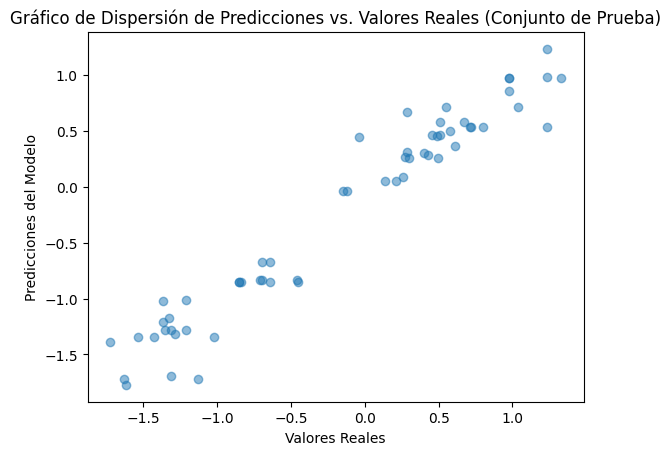

In [ ]:
y_pred_test1 = dt.predict(X_test1)

# Crea un gráfico de dispersión
plt.scatter(y_test1, y_pred_test1, alpha=0.5)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones del Modelo")
plt.title("Gráfico de Dispersión de Predicciones vs. Valores Reales (Conjunto de Prueba)")
plt.show()



In [ ]:
from sklearn.tree import plot_tree

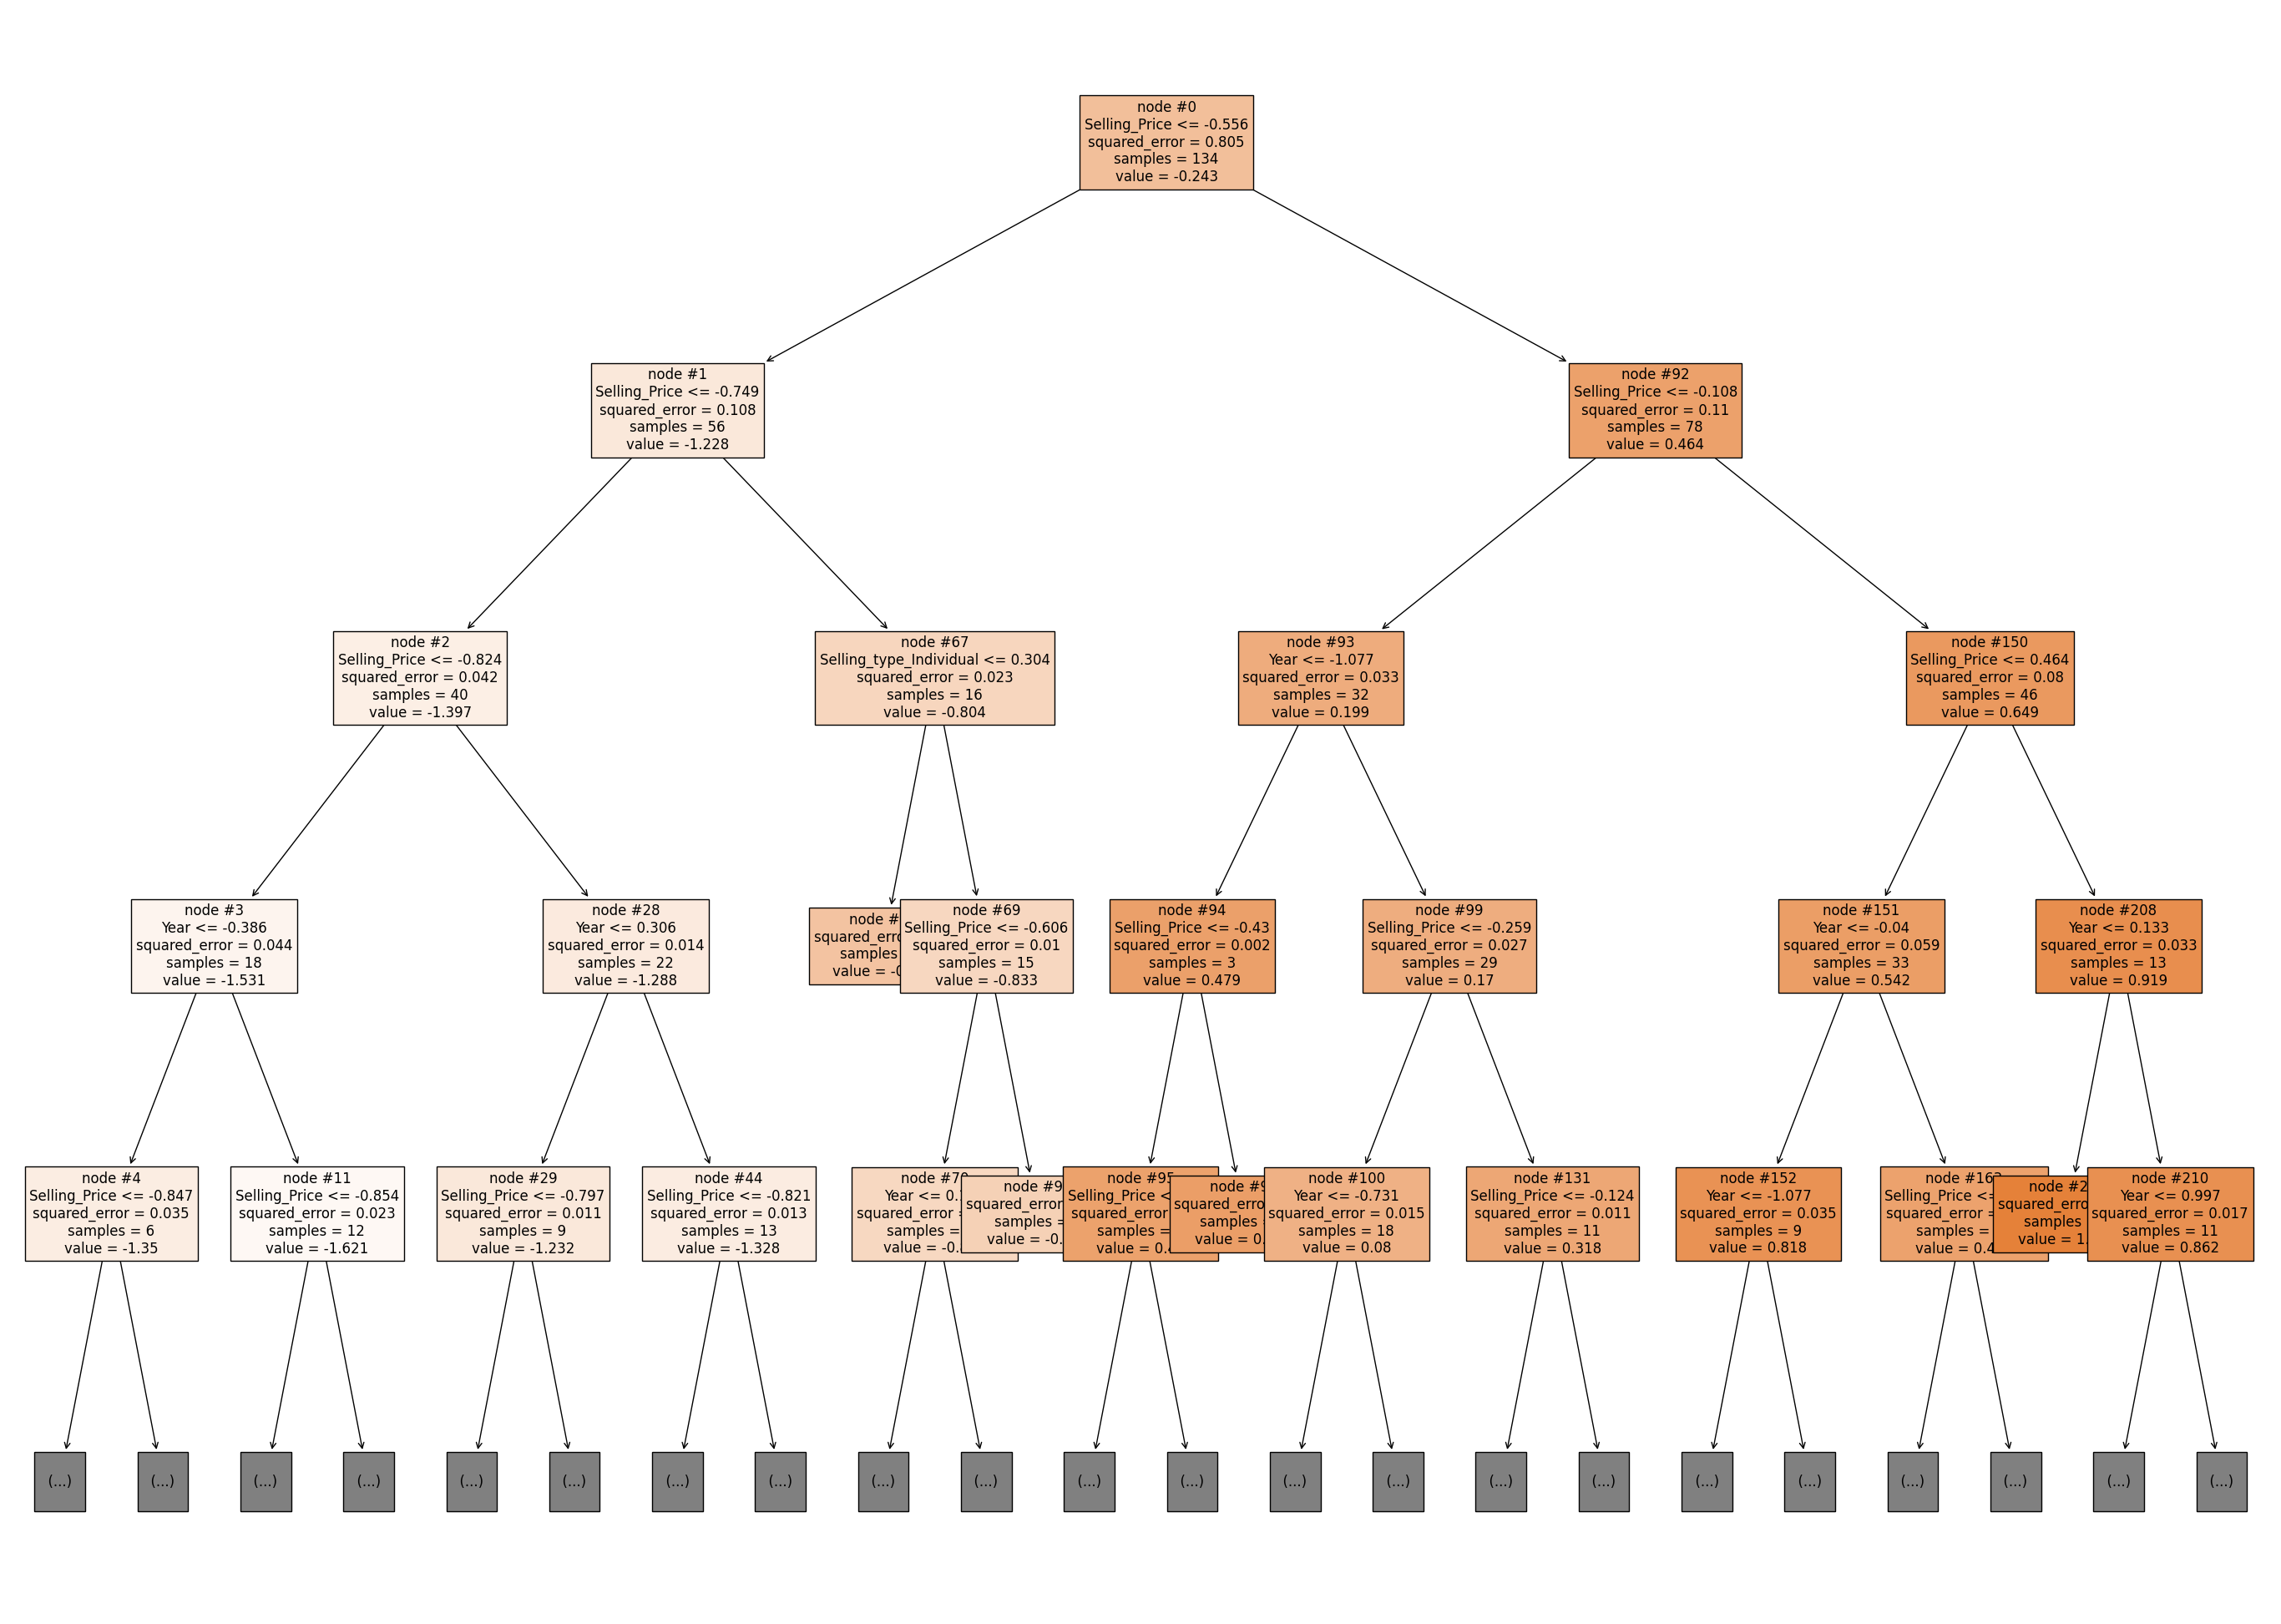

In [ ]:
features = list(X1.columns)

plt.figure(figsize=(35, 25))
plot_tree(dt, max_depth=4, feature_names=features, filled=True, fontsize=12, node_ids=True)
plt.show()

<Axes: xlabel='Importance'>

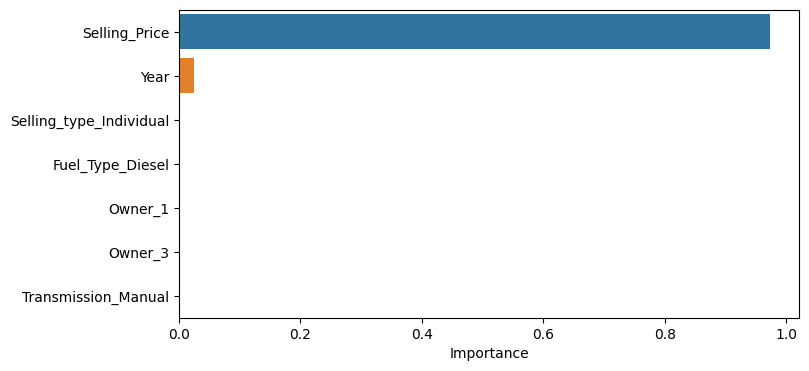

In [ ]:
importances = dt.feature_importances_
columns = X1.columns
importance_df = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(8, 4))
sns.barplot(x=importance_df.Importance, y=importance_df.index)

### **Construyendo RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Defining the Random forest regressor
rf = RandomForestRegressor(n_estimators = 200, max_depth = 4, min_samples_split = 2)

# Hyperparameters, we have randomly choosen them for now but we can tune these hyperparameters and get the best model.

# Fitting the model
rf.fit(X_train1,y_train1)


RandomForestRegressor(max_depth=4, n_estimators=200)

In [ ]:
rf.score(X_test1,y_test1)

0.9428486426381325

In [ ]:
model_pref(rf, X_train1, X_test1, y_train1, y_test1)

    Data      RMSE       MAE       R^2
0  Train  0.111639  0.086708  0.984525
1   Test  0.219262  0.168117  0.942849


<Axes: xlabel='Importance'>

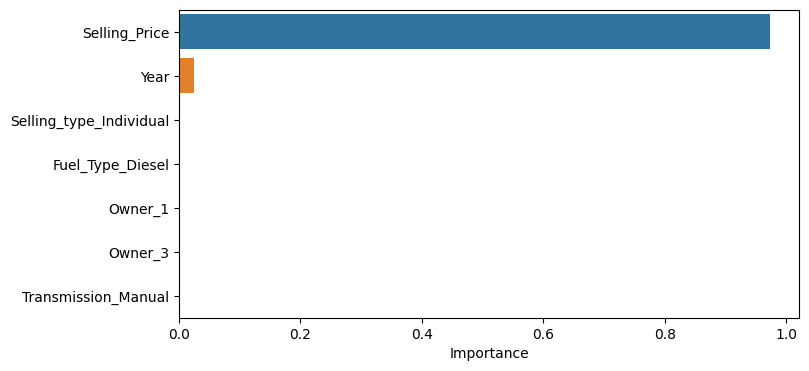

In [ ]:
importances = rf.feature_importances_
columns = X1.columns
importance_rf = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(8, 4))
sns.barplot(x=importance_df.Importance, y=importance_df.index)

##**GRADIENT BOOSTING**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

xgboosting_model = GradientBoostingRegressor(learning_rate=0.5,
                                          n_estimators=4,
                                          max_depth=6,
                                          random_state=29).fit(X_train, y_train)

xgboosting_model.fit(X_train1,y_train1)
xgboosting_model.score(X_test1,y_test1)

0.9335686929341259

In [ ]:
model_pref(xgboosting_model, X_train1, X_test1, y_train1, y_test1)

    Data      RMSE       MAE       R^2
0  Train  0.072665  0.059802  0.993444
1   Test  0.236394  0.183408  0.933569


## **XGBOOSTING**

In [ ]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

xgb_model.fit(X_train1,y_train1)
xgb_model.score(X_test1,y_test1)



0.9488060702657415

In [ ]:
model_pref(xgb_model, X_train1, X_test1, y_train1, y_test1)

    Data      RMSE       MAE       R^2
0  Train  0.027919  0.008487  0.999032
1   Test  0.207520  0.153422  0.948806
